# Task 03
## Iris Flower Classification with Python
### Submitted By: "Abdul Wahab"
### Submitted to: "CodSoft" 

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

#### Importing Dataset into our Jupyter Notebook

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 1. Data Analysis
We have to analyse our dataset in order to build a Machine Learning Model

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

-> Rewriting our values in "Species" column into numeric values so that we can convert it into numpy arrays

In [7]:
df['Species'] = df['Species'].replace('Iris-setosa',1)
df['Species'] = df['Species'].replace('Iris-versicolor',2)
df['Species'] = df['Species'].replace('Iris-virginica',3)

In [8]:
df['Species'].value_counts()

Species
1    50
2    50
3    50
Name: count, dtype: int64

-> Converting Pandas DataFrame into Numpy arrays so that we can use scikit-Learn to build ML Model.

In [9]:
X = df[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
X[0:5]

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [2. , 4.9, 3. , 1.4, 0.2],
       [3. , 4.7, 3.2, 1.3, 0.2],
       [4. , 4.6, 3.1, 1.5, 0.2],
       [5. , 5. , 3.6, 1.4, 0.2]])

In [10]:
y = df['Species'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

#### Splitting our data into train test split

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 5) (120,)
Test set: (30, 5) (30,)


#### Normalize Data 
-> Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:



In [12]:
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train_norm[0:5]

array([[-0.41046614,  0.87110766, -0.39172306,  0.46043367,  0.10671977],
       [ 0.47193236,  0.39378839, -0.39172306,  0.29163925,  0.10671977],
       [ 1.19595164,  1.58708656, -0.15901629,  1.13561136,  0.49479165],
       [ 0.85656761, -0.08353087, -0.62442982,  0.74175771,  1.52965   ],
       [ 1.58058689,  0.51311821, -1.32255012,  0.6854929 ,  0.88286353]])

In [13]:
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm[0:5]

array([[ 0.49116611,  0.73821653, -1.59411989,  0.43698644,  0.25107207],
       [ 1.10941716,  0.86926089, -0.67883574,  0.97328799,  1.10376967],
       [-1.49238934, -0.44118266,  1.60937462, -1.29109631, -1.31220686],
       [ 0.59420795,  0.47612782,  0.00762737,  0.55616457,  0.39318834],
       [-0.48773138, -0.96536008,  0.69409048, -1.35068538, -1.31220686]])

-> Importing sklearn libraries to build a model

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Classifier
#### K-Nearest Neighbor
We are going to use KNN Classifier to build model in this case.

#### What about other K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


### Building and Evaluating Model for different values and K and finding the best value for K.

In [15]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1,ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train_norm, y_train)
    yhat = neigh.predict(X_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.        , 1.        , 0.96666667, 1.        , 0.96666667,
       1.        , 0.93333333, 1.        , 0.96666667])

In [16]:
std_acc

array([0.        , 0.        , 0.03277307, 0.        , 0.03277307,
       0.        , 0.045542  , 0.        , 0.03277307])

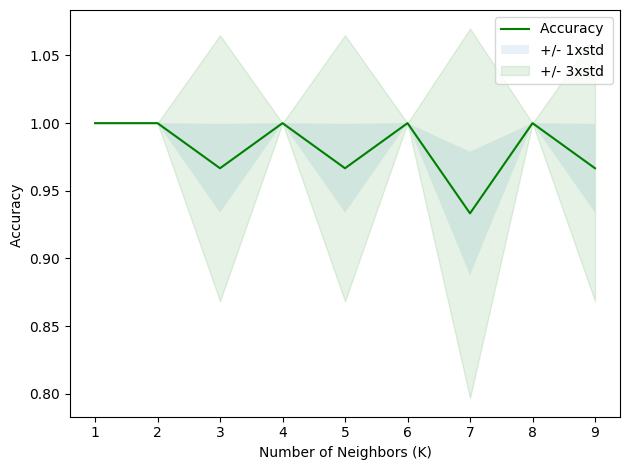

In [17]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 1
